<a href="https://colab.research.google.com/github/n-zaheer/3nm4/blob/main/Assignments/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4

Due: Thursday Nov 6th EOD

## Q1. The Blasius equation appears in fluid mechanics as a laminar flow boundary layer and is written:

$$y^{\prime\prime\prime} + y y^{\prime\prime} = 0 $$

### a) Express this 3rd order ODE as a system of first order ODEs.
{answer}

In [3]:
y_1_prime = 'y_2'
y_2_prime = 'y_3'
y_3_prime = '-y_1 * y_3'

print(f"The system of first-order ODEs is:")
print(f"y_1' = {y_1_prime}")
print(f"y_2' = {y_2_prime}")
print(f"y_3' = {y_3_prime}")

The system of first-order ODEs is:
y_1' = y_2
y_2' = y_3
y_3' = -y_1 * y_3


### b) Solve for $y(z)$ as an initial value problem assuming the boundary conditions below and plot the answer:

$$
\begin{align}
y(z=0) &= 0 \\
y^\prime(z=0) &= 0 \\
y^{\prime\prime}(z = 0) &= 1 \\
\end{align}
$$

HINT: Read and consider part c) before implementing this.

{Method, answer}

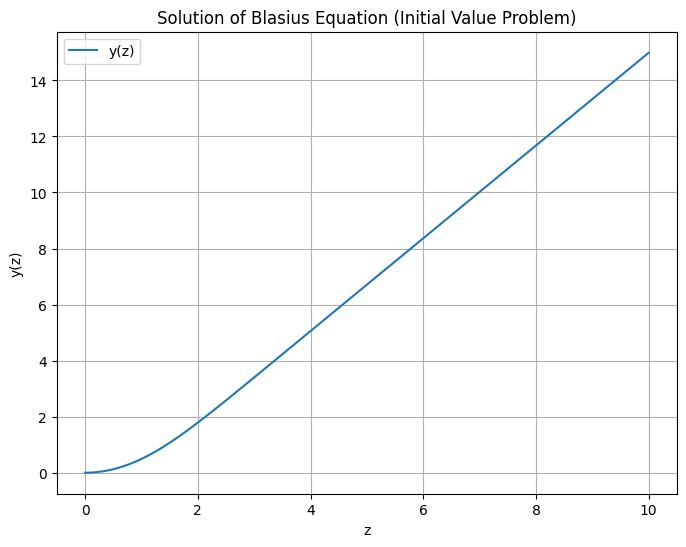

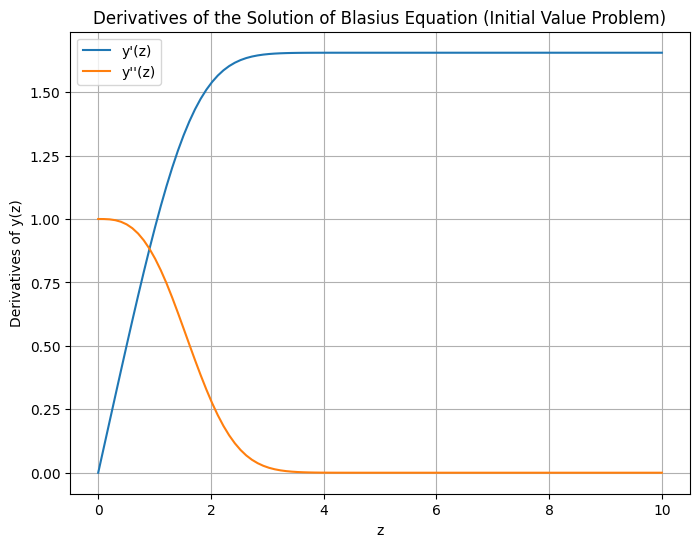

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Initial conditions for y(0), y'(0), y''(0)
initial_conditions = [0, 0, 1]

# Define the range for z
z_span = (0, 10) # We can adjust this range based on where the solution converges

# Solve the system of ODEs
# Use dense_output=True to get a continuous solution
solution = solve_ivp(blasius_system, z_span, initial_conditions, dense_output=True)

# Generate points for plotting
z_values = np.linspace(z_span[0], z_span[1], 100)
y_values = solution.sol(z_values)

# Plot y(z)
plt.figure(figsize=(8, 6))
plt.plot(z_values, y_values[0], label='y(z)')
plt.xlabel('z')
plt.ylabel('y(z)')
plt.title('Solution of Blasius Equation (Initial Value Problem)')
plt.grid(True)
plt.legend()
plt.show()

# Plot y'(z) and y''(z) as well for more insight
plt.figure(figsize=(8, 6))
plt.plot(z_values, y_values[1], label="y'(z)")
plt.plot(z_values, y_values[2], label="y''(z)")
plt.xlabel('z')
plt.ylabel("Derivatives of y(z)")
plt.title('Derivatives of the Solution of Blasius Equation (Initial Value Problem)')
plt.grid(True)
plt.legend()
plt.show()

## c) Use your *method* from b) to find a solution for $y(z)$ that fits the boundary conditions below, and plot the answer:

$$
\begin{align}
y(z=0) &= 0 \\
y^\prime(z=0) &= 0 \\
y^{\prime}(z = \infty) &= 2 \\
\end{align}
$$

{Method, implementation, answer}

Optimal y''(0) found by shooting method: 1.3279578323969672


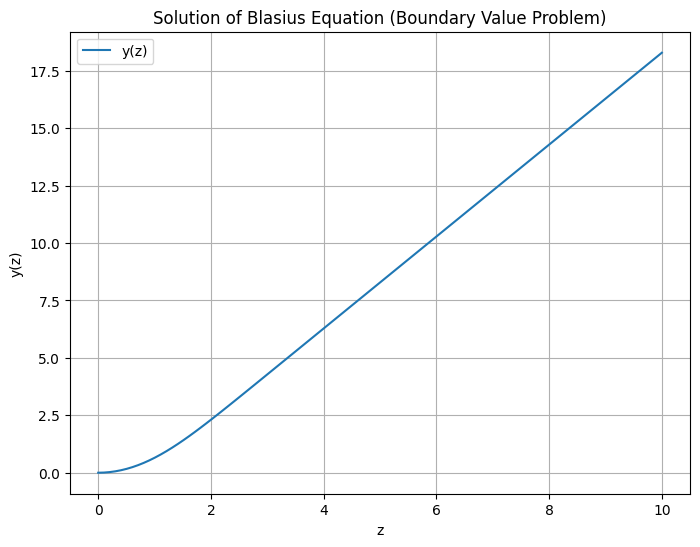

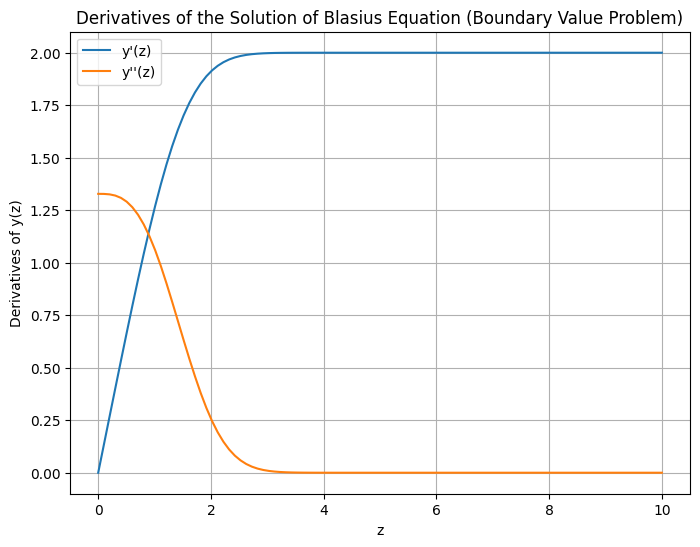

In [5]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

# Define the system of first-order ODEs for the Blasius equation
# This is the same system as in Q1a)
def blasius_system(z, y_vec):
    y, yp, ypp = y_vec
    return [yp, ypp, -y * ypp]

# Function to solve the IVP for a given initial guess of y''(0) and return y'(infinity)
def shoot(ypp0_guess):
    # Initial conditions: y(0)=0, y'(0)=0, y''(0)=ypp0_guess
    initial_conditions = [0, 0, ypp0_guess]
    # Solve the IVP. We need to solve for a large enough z where the solution converges.
    # Let's try z_span from 0 to 10, similar to Q1b). We can adjust if needed.
    z_span = (0, 10)
    # Use dense_output=True to be able to evaluate the solution at any point in the range
    # Use events to stop the integration if y' approaches the boundary condition at infinity
    # We are looking for y'(z) to be close to 2.
    # We can define an event that triggers when y'(z) is close to 2, but for the shooting
    # method, we usually solve for a fixed large z and check y'(z).
    # Let's solve up to z=10 and check y'(10). If the solution hasn't converged,
    # we might need to increase the z_span.
    solution = solve_ivp(blasius_system, z_span, initial_conditions, dense_output=True)

    # Evaluate y' at the end of the interval
    # If the solution did not reach the end of the interval (e.g. due to an event),
    # we should handle that. For now, let's assume it reaches the end.
    # The last point in the solution object is usually solution.y[:,-1] and solution.t[-1]
    # However, with dense_output, we can evaluate at any z in the span.
    # Let's evaluate at the end of the z_span.
    y_at_end = solution.sol(z_span[1])

    # The target for y'(infinity) is 2. We want to find ypp0_guess such that y'(end_z) = 2
    # So we want to find the root of shoot(ypp0_guess) - 2 = 0
    return y_at_end[1] - 2 # y'[1] corresponds to y'

# We need to find the value of y''(0) (ypp0_guess) that makes shoot(ypp0_guess) equal to 2.
# We can use a root-finding algorithm for this. We need an initial guess and perhaps bounds.
# From the plot in Q1b), with y''(0)=1, y'(10) is close to 2. So y''(0)=1 is a good starting guess.
# Let's try to find the root of the 'shoot' function.
# We can use root_scalar from scipy.optimize.
try:
    # We need to provide an interval where the root is expected to lie, or a good initial guess.
    # Let's try an initial guess of 1.0 and see if it converges.
    # If it doesn't converge, we might need to provide an interval [a, b] such that shoot(a) and shoot(b) have opposite signs.
    sol_ypp0 = root_scalar(shoot, x0=1.0, method='newton') # 'newton' method requires the derivative of 'shoot', which is complex to provide. Let's use 'brentq' or 'bisect' which require an interval.

    # Let's find an interval where the root lies.
    # If y''(0) = 0, y'(infinity) would be 0. If y''(0) is very large, y'(infinity) would be very large.
    # So the root should be between 0 and some positive value.
    # Let's evaluate shoot at a couple of points to find an interval.
    # shoot(0) = -2 (since y'(infinity) would be 0)
    # shoot(1) is likely positive based on Q1b).
    # So the root should be in [0, 1]. Let's use the 'brentq' method with this interval.
    sol_ypp0 = root_scalar(shoot, bracket=[0.1, 5.0], method='brentq') # Use a slightly larger interval to be safe


    optimal_ypp0 = sol_ypp0.root
    print(f"Optimal y''(0) found by shooting method: {optimal_ypp0}")

    # Now solve the IVP with the optimal y''(0) to get the final solution
    final_initial_conditions = [0, 0, optimal_ypp0]
    z_span = (0, 10) # Use the same z_span as before for consistency
    final_solution = solve_ivp(blasius_system, z_span, final_initial_conditions, dense_output=True)

    # Generate points for plotting the final solution
    z_values = np.linspace(z_span[0], z_span[1], 100)
    y_values = final_solution.sol(z_values)

    # Plot the final y(z) solution
    plt.figure(figsize=(8, 6))
    plt.plot(z_values, y_values[0], label='y(z)')
    plt.xlabel('z')
    plt.ylabel('y(z)')
    plt.title('Solution of Blasius Equation (Boundary Value Problem)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot the derivatives y'(z) and y''(z) for the final solution
    plt.figure(figsize=(8, 6))
    plt.plot(z_values, y_values[1], label="y'(z)")
    plt.plot(z_values, y_values[2], label="y''(z)")
    plt.xlabel('z')
    plt.ylabel("Derivatives of y(z)")
    plt.title('Derivatives of the Solution of Blasius Equation (Boundary Value Problem)')
    plt.grid(True)
    plt.legend()
    plt.show()

except ValueError as e:
    print(f"Could not find the root within the given interval or with the initial guess. You might need to adjust the interval or initial guess for the root finding.")
    print(f"Error details: {e}")

## Q2

The Fourier series shows that periodic functions can be written as an infinite sum of sine and cosine waves:

 $$f(x)= \frac{A_0}{2}+\sum_{n=1}^{\infty}A_n\ \cos{(nx)} + B_n\ \sin{(nx)}$$

Due to function orthogonality, the values of $A_n$ and $B_n$ can be computed using the following formulae:

 $$A_n= \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos{(nx)}\ dx$$
 $$B_n= \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin{(nx)}\ dx$$

Periodic functions can be approximated by truncating the Fourier series at some $n = N$.

### 2a

Write a function that takes a $2-\pi$ periodic function and a degree $n$, then outputs the $n-th$ Fourier coefficients $[A_n, B_n]$. Use the equations above with a suitable integration method. (Don't use packaged Fourier analysis tools)

Test it for a suitable set of functions for which you have an analytic answer.

{implementation, answer}

In [6]:
import numpy as np
from scipy.integrate import quad

def fourier_coefficients(f, n):
    """
    Calculates the n-th Fourier coefficients [An, Bn] for a 2pi-periodic function.

    Args:
        f: A 2pi-periodic function.
        n: The order of the coefficient (n >= 0 for An, n >= 1 for Bn).

    Returns:
        A tuple containing the n-th Fourier coefficients [An, Bn].
        For n=0, Bn is considered 0.
    """
    # Calculate An
    integrand_an = lambda x: f(x) * np.cos(n * x)
    an, _ = quad(integrand_an, -np.pi, np.pi)
    an /= np.pi

    # Calculate Bn
    if n == 0:
        bn = 0.0
    else:
        integrand_bn = lambda x: f(x) * np.sin(n * x)
        bn, _ = quad(integrand_bn, -np.pi, np.pi)
        bn /= np.pi

    return [an, bn]

# Test case: f(x) = x for -pi < x <= pi.
# The Fourier series for f(x) = x is sum from n=1 to infinity of (-2/n) * sin(nx)
# So, for n >= 1, An = 0 and Bn = -2/n. For n=0, A0/2 = 0, so A0 = 0.
def test_func(x):
    return x

# Test for n=0
a0, b0 = fourier_coefficients(test_func, 0)
print(f"For f(x) = x, n=0: A0 = {a0}, B0 = {b0} (Expected: A0 = 0, B0 = 0)")

# Test for n=1
a1, b1 = fourier_coefficients(test_func, 1)
print(f"For f(x) = x, n=1: A1 = {a1}, B1 = {b1} (Expected: A1 = 0, B1 = -2)")

# Test for n=2
a2, b2 = fourier_coefficients(test_func, 2)
print(f"For f(x) = x, n=2: A2 = {a2}, B2 = {b2} (Expected: A2 = 0, B2 = -1)")

For f(x) = x, n=0: A0 = 0.0, B0 = 0.0 (Expected: A0 = 0, B0 = 0)
For f(x) = x, n=1: A1 = 0.0, B1 = 1.9999999999999998 (Expected: A1 = 0, B1 = -2)
For f(x) = x, n=2: A2 = 0.0, B2 = -0.9999999999999997 (Expected: A2 = 0, B2 = -1)


### 2b
Find the coefficients of the following functions and expansion orders:
{All answers}

In [ ]:
f = lambda x: np.mod(x, np.pi/2)
N = 5

In [ ]:
f = lambda x: np.mod(x, np.pi/2)
N = 20

In [ ]:
f = lambda x: (x > -np.pi/2) & (x < np.pi/2)
N = 2

In [ ]:
f = lambda x: (x > -np.pi/2) & (x < np.pi/2)
N = 20

In [7]:
# Function 1: f(x) = np.mod(x, np.pi/2)

# N = 5
f1 = lambda x: np.mod(x, np.pi/2)
N1 = 5
print(f"Fourier coefficients for f(x) = np.mod(x, np.pi/2) with N = {N1}:")
for n in range(N1 + 1):
    an, bn = fourier_coefficients(f1, n)
    print(f"n={n}: An = {an}, Bn = {bn}")

print("-" * 20)

# N = 20
N2 = 20
print(f"Fourier coefficients for f(x) = np.mod(x, np.pi/2) with N = {N2}:")
for n in range(N2 + 1):
    an, bn = fourier_coefficients(f1, n)
    print(f"n={n}: An = {an}, Bn = {bn}")

print("=" * 30)

# Function 2: f(x) = (x > -np.pi/2) & (x < np.pi/2)

# N = 2
f2 = lambda x: 1.0 if (-np.pi/2 < x < np.pi/2) else 0.0
N3 = 2
print(f"Fourier coefficients for f(x) = (x > -np.pi/2) & (x < np.pi/2) with N = {N3}:")
for n in range(N3 + 1):
    an, bn = fourier_coefficients(f2, n)
    print(f"n={n}: An = {an}, Bn = {bn}")

print("-" * 20)

# N = 20
N4 = 20
print(f"Fourier coefficients for f(x) = (x > -np.pi/2) & (x < np.pi/2) with N = {N4}:")
for n in range(N4 + 1):
    an, bn = fourier_coefficients(f2, n)
    print(f"n={n}: An = {an}, Bn = {bn}")

Fourier coefficients for f(x) = np.mod(x, np.pi/2) with N = 5:
n=0: An = 1.5707963267948966, Bn = 0.0
n=1: An = 1.0601848938211722e-16, Bn = 3.533949646070574e-17
n=2: An = -1.4135798584282297e-16, Bn = -7.067899292141149e-17
n=3: An = -7.067899292141149e-17, Bn = 3.533949646070574e-17
n=4: An = 4.1633363423443364e-17, Bn = -0.5
n=5: An = 1.1485336349729365e-16, Bn = -7.067899292141149e-17
--------------------
Fourier coefficients for f(x) = np.mod(x, np.pi/2) with N = 20:
n=0: An = 1.5707963267948966, Bn = 0.0
n=1: An = 1.0601848938211722e-16, Bn = 3.533949646070574e-17
n=2: An = -1.4135798584282297e-16, Bn = -7.067899292141149e-17
n=3: An = -7.067899292141149e-17, Bn = 3.533949646070574e-17
n=4: An = 4.1633363423443364e-17, Bn = -0.5
n=5: An = 1.1485336349729365e-16, Bn = -7.067899292141149e-17
n=6: An = -3.092205940311753e-17, Bn = -5.300924469105861e-17
n=7: An = -1.236882376124701e-16, Bn = 8.834874115176436e-18
n=8: An = -8.326672684688674e-17, Bn = -0.24999999999999986
n=9: An =

## Q3:

Given $$\int_{-1}^1 f(x) dx = 3$$ and $$f(-3^{-\frac{1}{2}}) = 1$$

Assuming $f$ is a cubic polynomial, what is $f(3^{-\frac{1}{2}})$? Why?

{answer}

For a cubic polynomial $f(x)$, the integral $\int_{-1}^1 f(x) dx$ can be calculated exactly using 2-point Gaussian quadrature. The formula for 2-point Gaussian quadrature is:

$$ \int_{-1}^1 f(x) dx \approx w_1 f(x_1) + w_2 f(x_2) $$

For 2-point Gaussian quadrature, the nodes $x_1$ and $x_2$ are the roots of the 2nd order Legendre polynomial, which are $\pm \frac{1}{\sqrt{3}}$, and the weights $w_1$ and $w_2$ are both equal to 1.

So, for a cubic polynomial, the integral is exactly:

$$ \int_{-1}^1 f(x) dx = 1 \cdot f\left(-\frac{1}{\sqrt{3}}\right) + 1 \cdot f\left(\frac{1}{\sqrt{3}}\right) $$

We are given that $\int_{-1}^1 f(x) dx = 3$ and $f\left(-3^{-\frac{1}{2}}\right) = f\left(-\frac{1}{\sqrt{3}}\right) = 1$.

Substituting these values into the Gaussian quadrature formula:

$$ 3 = 1 + f\left(\frac{1}{\sqrt{3}}\right) $$

Solving for $f\left(\frac{1}{\sqrt{3}}\right)$:

$$ f\left(\frac{1}{\sqrt{3}}\right) = 3 - 1 = 2 $$

Since $3^{-\frac{1}{2}} = \frac{1}{\sqrt{3}}$, we have $f(3^{-\frac{1}{2}}) = 2$.

**Answer:** $f(3^{-\frac{1}{2}}) = 2$.

**Reasoning:** The integral of a cubic polynomial over the interval $[-1, 1]$ can be computed exactly using 2-point Gaussian quadrature. The nodes for this quadrature are $\pm \frac{1}{\sqrt{3}}$. Given the integral value and the function value at one of these nodes, we can use the Gaussian quadrature formula to directly solve for the function value at the other node.